In [2]:
import sys
sys.path.append(r"/home/graham/Documents/Ironhack/Final-Project")
import src
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = '/home/graham/Documents/Ironhack/Final-Project/data/tax_df.csv'
tax_df = src.read_csv_file(path)

In [4]:
path = '/home/graham/Documents/Ironhack/Final-Project/data/inflation_df.csv'
inflation_df = src.read_csv_file(path)

In [5]:
path = '/home/graham/Documents/Ironhack/Final-Project/data/GHI.csv'
ghi_df = src.read_csv_file(path)

In [6]:
path = '/home/graham/Documents/Ironhack/Final-Project/data/excessdeath_df.csv'
ed_df = src.read_csv_file(path)

In [7]:
#standardizing ed_df
columns = ['Unnamed: 0', 'index', '2020']
ed_df=ed_df.drop(columns=columns)
ed_df = ed_df.rename(columns={'country':'Country', 'code': 'Code', '2021': '2021 ED', '2022': '2022 ED'})

In [8]:
#standardizing tax_df 
tax_df.columns
columns = ['Unnamed: 0', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019', '2020','mean_tax_rate']
tax_df = tax_df.drop(columns=columns)

#adding country code
import pycountry
codes = []
for country in tax_df['country']:
    try:
        code = pycountry.countries.search_fuzzy(country)[0].alpha_3
    except LookupError:
        code = 'unknown'
    codes.append(code)
tax_df['Code'] = codes

#adjusting the columns
tax_df = tax_df.reindex(columns=['country', 'Code', '2021', '2022']).rename(columns={'country':'Country', '2021':'2021 TR', '2022':'2022 TR'})

In [9]:
columns = ['Unnamed: 0','Indicator Type', 'Series Name', '2008', '2009', '2010', '2011', '2012',
'2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'IMF Country Code', 'Note', 'mean_inflation']

inflation_df = inflation_df.drop(columns=columns)
inflation_df = inflation_df.rename(columns={'Country Code': 'Code', '2021': '2021 Inf', '2022': '2022 Inf'}).reindex(columns=['Country', 'Code', '2021 Inf', '2022 Inf'])

In [10]:
ghi_df = ghi_df.drop(columns='Unnamed: 0')
df_wide = ghi_df.pivot(index='Country', columns='Year', values='GHI')
df_wide = df_wide.reset_index()
df_wide = df_wide.rename(columns=lambda x: f'{x} GHI' if isinstance(x, int) else x)
codes = []
for country in df_wide['Country']:
    try:
        code = pycountry.countries.search_fuzzy(country)[0].alpha_3
    except LookupError:
        code = 'unknown'
    codes.append(code)
df_wide['Code'] = codes
ghi_df = df_wide.reindex(columns=['Country', 'Code', '2021 GHI', '2022 GHI'])

In [11]:
merged_df = pd.merge(tax_df, inflation_df, on='Code', how='inner')
merged_df = pd.merge(merged_df, ed_df, on='Code', how='inner')
merged_df = pd.merge(merged_df, ghi_df, on='Code', how='inner')

/tmp/ipykernel_91243/1744120211.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Country_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, ghi_df, on='Code', how='inner')


In [12]:
correlation_df = merged_df.drop(columns=merged_df.filter(like='Country').columns)

In [13]:
correlation_df = correlation_df.set_index('Code')

In [14]:
correlation_df = correlation_df.dropna()

In [15]:
correlation_df.to_csv('/home/graham/Documents/Ironhack/Final-Project/data/combined_data.csv')

In [16]:
corr_matrix = correlation_df.corr()

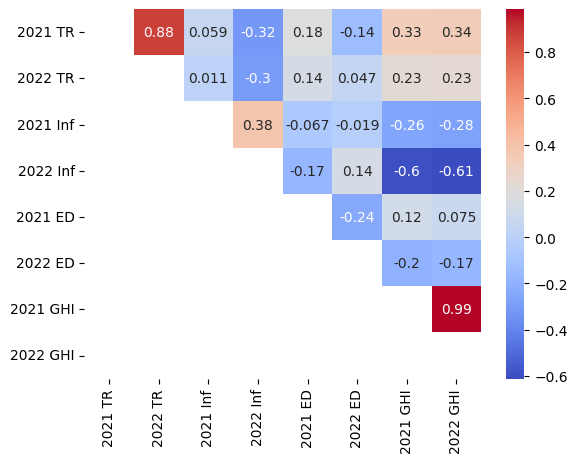

In [17]:
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
pearson = sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True)
pearson.set_xticklabels(pearson.get_xticklabels(), rotation=90)
plt.savefig('/home/graham/Documents/Ironhack/Final-Project/images/pearson.png', bbox_inches='tight')

In [18]:
kt_matrix = correlation_df.corr(method='kendall')

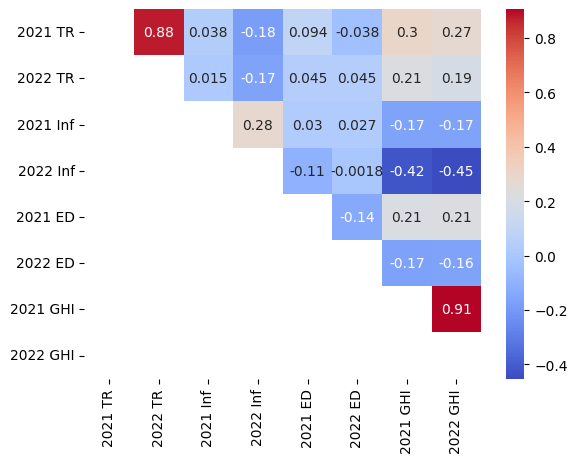

In [20]:
mask = np.tril(np.ones_like(kt_matrix, dtype=bool))
kt = sns.heatmap(kt_matrix, mask=mask, cmap='coolwarm', annot=True)
plt.savefig('/home/graham/Documents/Ironhack/Final-Project/images/kt.png', bbox_inches='tight')